# Imports Padrões

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Datasets

In [2]:
df_train = pd.read_csv('data/fashion-mnist_train.csv', sep=',')
df_test = pd.read_csv('data/fashion-mnist_test.csv', sep=',')

In [3]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_train.shape

(60000, 785)

In [5]:
df_test.shape

(10000, 785)

Os datasets contém 785 colunas, estas colunas identificam um valor decimal de 0 a 255 de cada pixel da imagem, as imagens tem seu tamanho definido por 28 x 28 pixels

Para o dataset de treinamento possuímos 60000 imagens.
Para o dataset de teste possuímos 10000 imagens.

# Visualizando os dados

In [6]:
# Realizando a transformação dos dados do dataset em vetores

training = np.array(df_train, dtype='float32')
testing = np.array(df_test, dtype='float32')

In [7]:
training.shape

(60000, 785)

In [8]:
testing.shape

(10000, 785)

## Imagem de um registro 

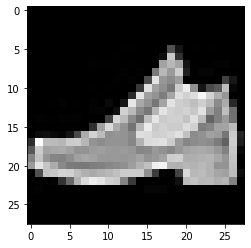

In [9]:
# Exemplo do primeiro registro do dataset de treinamento representado na escala cinza
plt.imshow(training[1, 1:].reshape((28,28)), cmap='gray')

## Imagem de vários registros do dataset

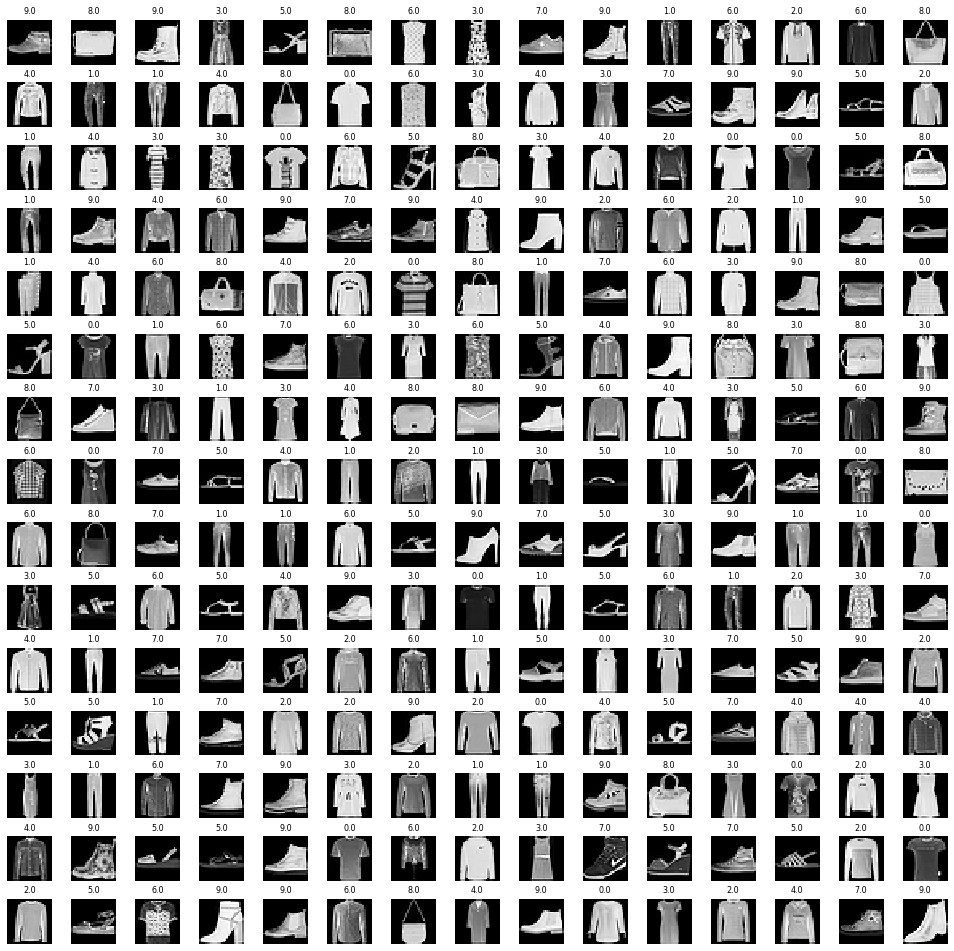

In [10]:
import random

#Definindo o tamanho do grid de imagens
grid_length = 15
grid_width = 15

# A função subplots() retorna uma figure object e os axes do mesmo
# com o uso dos axes é possível preencher uma posição pré-definida 
# no que será apresentado como um grid de imagens

fig, axes = plt.subplots(grid_length, grid_width, figsize=(17,17))

# Transforma a matriz em um vetor de 225 posições
axes = axes.ravel()

# Obtendo a quantidade de imagens existentes no dataset
n_training = len(training)


for i in np.arange(0, grid_width * grid_length):
    
    # Seleciona um número aleatório entre 0 e n_training
    index = np.random.randint(0, n_training)

    # Lê e apresenta a imagem no indice do grid
    axes[i].imshow(training[index, 1:].reshape((28,28)), cmap='gray')
    axes[i].set_title(training[index, 0], fontsize = 8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)    

# Pré-Processamento dos Dados

In [11]:
# Prepara o dataset de treinamento e teste

# Aplica a normalização dos features do dataset, a fim de realizar o processamento em uma rede neural artificial
X_train = training[:,1:]/255
X_test = testing[:,1:]/255

y_train = training[:,0]
y_test = testing[:,0]

In [12]:
# Realizando o split de dados para o treinamento e avaliação do modelo
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state = 1)

In [13]:
X_train.shape

(48000, 784)

In [14]:
X_valid.shape

(12000, 784)

In [15]:
# Transformando o .shape dos datasets
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_valid = X_valid.reshape(X_valid.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

In [16]:
X_train.shape

(48000, 28, 28, 1)

In [17]:
X_valid.shape

(12000, 28, 28, 1)

In [18]:
X_test.shape

(10000, 28, 28, 1)

# Modelo

In [19]:
!pip install keras

In [20]:
!pip install tensorflow

In [21]:
# Keras é uma biblioteca open-source de Redes Neurais muito útil
# Nesta biblioteca é possível utiizar modelos, camadas, otimizadores focados em redes neurais
import tensorflow
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard


# Será utilizado mais específicamente o modelo de Rede Neural Convolucional

# Instanciando modelo
model = Sequential()

# Adicionando as camadas da nossa rede neural
model.add(Conv2D(64, 3, 3, input_shape = (28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'sigmoid'))

In [22]:
model.compile(loss='sparse_categorical_crossentropy', optimizer= Adam(lr=0.001), metrics=['accuracy'])

In [23]:
# Epochs tem uma representação similar aos folds dos cross validations
epochs = 50

history = model.fit(X_train, y_train, 
                   batch_size = 512,
                   epochs = epochs,
                   verbose = 1,
                   validation_data = (X_valid, y_valid)
                   )

Epoch 1/50
94/94 [==============================] - 4s 44ms/step - loss: 1.3495 - accuracy: 0.5601 - val_loss: 0.7358 - val_accuracy: 0.7427
Epoch 2/50
94/94 [==============================] - 4s 39ms/step - loss: 0.6801 - accuracy: 0.7539 - val_loss: 0.6052 - val_accuracy: 0.7794
Epoch 3/50
94/94 [==============================] - 4s 38ms/step - loss: 0.6023 - accuracy: 0.7805 - val_loss: 0.5492 - val_accuracy: 0.8030
Epoch 4/50
94/94 [==============================] - 4s 39ms/step - loss: 0.5551 - accuracy: 0.7980 - val_loss: 0.5203 - val_accuracy: 0.8108
Epoch 5/50
94/94 [==============================] - 4s 39ms/step - loss: 0.5305 - accuracy: 0.8050 - val_loss: 0.4961 - val_accuracy: 0.8187
Epoch 6/50
94/94 [==============================] - 4s 39ms/step - loss: 0.5135 - accuracy: 0.8133 - val_loss: 0.4786 - val_accuracy: 0.8259
Epoch 7/50
94/94 [==============================] - 4s 39ms/step - loss: 0.4998 - accuracy: 0.8176 - val_loss: 0.4715 - val_accuracy: 0.8268
Epoch 8/50
94

# Avaliação do Modelo

In [24]:
avaliacao = model.evaluate(X_test, y_test)
print(f'Precisao do test --> {avaliacao[1]}')

313/313 [==============================] - 0s 1ms/step - loss: 0.3550 - accuracy: 0.8671
Precisao do test --> 0.8671000003814697


In [25]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


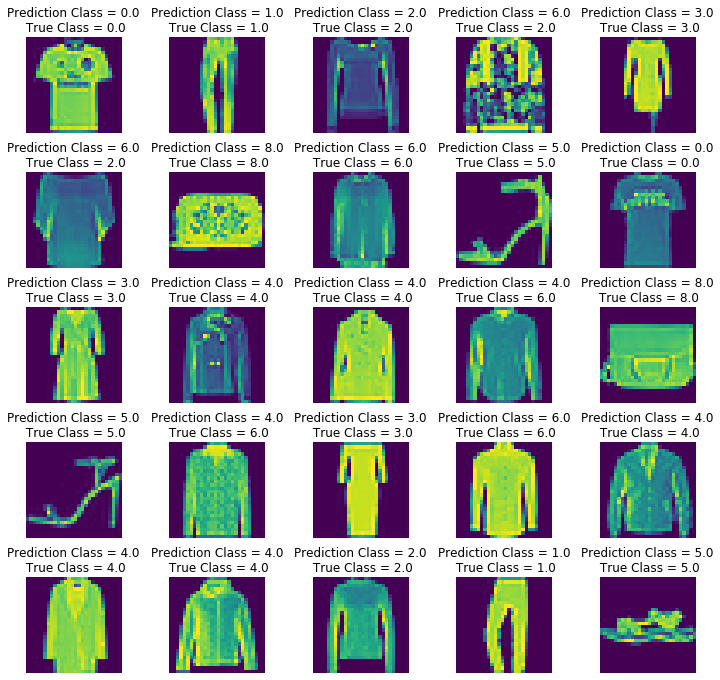

In [26]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predictions[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

In [27]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predictions, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.83      0.79      0.81      1000
     Class 1       0.98      0.97      0.98      1000
     Class 2       0.86      0.73      0.79      1000
     Class 3       0.84      0.92      0.88      1000
     Class 4       0.74      0.85      0.79      1000
     Class 5       0.99      0.91      0.95      1000
     Class 6       0.66      0.62      0.64      1000
     Class 7       0.87      0.97      0.92      1000
     Class 8       0.97      0.97      0.97      1000
     Class 9       0.97      0.93      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



# Aperfeiçoando o modelo

In [29]:
model = Sequential()

# Adicionando as camadas da nossa rede neural
model.add(Conv2D(64, 3, 3, input_shape = (28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'sigmoid'))

model.compile(loss='sparse_categorical_crossentropy', optimizer= Adam(lr=0.001), metrics=['accuracy'])

epochs = 50

history = model.fit(X_train, y_train, 
                   batch_size = 512,
                   epochs = epochs,
                   verbose = 1,
                   validation_data = (X_valid, y_valid)
                   )

avaliacao = model.evaluate(X_test, y_test)
print(f'Precisao do test --> {avaliacao[1]}')

new_predictions = model.predict_classes(X_test)

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]



print(classification_report(y_test, predictions, target_names = target_names))

Epoch 1/50
94/94 [==============================] - 4s 39ms/step - loss: 1.2766 - accuracy: 0.5891 - val_loss: 0.6920 - val_accuracy: 0.7477
Epoch 2/50
94/94 [==============================] - 4s 42ms/step - loss: 0.6462 - accuracy: 0.7656 - val_loss: 0.5817 - val_accuracy: 0.7893
Epoch 3/50
94/94 [==============================] - 4s 42ms/step - loss: 0.5716 - accuracy: 0.7926 - val_loss: 0.5277 - val_accuracy: 0.8102
Epoch 4/50
94/94 [==============================] - 4s 43ms/step - loss: 0.5373 - accuracy: 0.8052 - val_loss: 0.5103 - val_accuracy: 0.8133
Epoch 5/50
94/94 [==============================] - 4s 45ms/step - loss: 0.5117 - accuracy: 0.8137 - val_loss: 0.4765 - val_accuracy: 0.8276
Epoch 6/50
94/94 [==============================] - 4s 44ms/step - loss: 0.4906 - accuracy: 0.8215 - val_loss: 0.4616 - val_accuracy: 0.8308
Epoch 7/50
94/94 [==============================] - 4s 41ms/step - loss: 0.4785 - accuracy: 0.8254 - val_loss: 0.4593 - val_accuracy: 0.8292
Epoch 8/50
94